# 환경 설정

In [99]:
# !pip install keras
# !pip install tensorflow
# 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신 러닝 모델
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 딥러닝 모델
from keras.backend import clear_session
from keras.models import Sequential, Model
from keras.layers import Dense, Input, SimpleRNN, LSTM
from keras.optimizers import Adam

# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
project_path = '/content/drive/MyDrive/미니 프로젝트/캐글/'

import warnings
warnings.filterwarnings('ignore')

In [100]:
import os
os.getcwd()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 분석

라벨 설명
- 1: 걷기
- 2: 뛰기
- 3: 천천히 걷기
- 4: 계단 오르기
- 5: 계단 내려가기
- 6: 서있기
- 7: 앉아있기
- 8: 누워있기
- 9: 자전거 타기
- 10: 서서 자전거 타기
- 11: 자전거에 앉아있기

In [101]:
# 데이터 불러오기
train = pd.read_csv(project_path+'train.csv')
test = pd.read_csv(project_path+'test.csv')

In [102]:
# 기본 분석
train.shape, test.shape

((100000, 9), (13234, 8))

In [103]:
train.head(5)

,Unnamed: 0,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
0,0,2019-01-12 00:45:54.450,-0.259130,-0.834869,-0.485499,0.196409,NaN,0.384934,8
1,1,2000-01-01 01:37:06.440,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2
2,2,2019-01-12 00:45:33.900,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8
3,3,2000-01-01 00:46:22.680,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11
4,4,2000-01-01 00:49:56.620,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6


In [104]:
train.tail(5)

,Unnamed: 0,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
99995,99995,2000-01-01 00:25:51.300,-0.499562,0.012127,0.365746,NaN,-0.040284,-0.180426,10
99996,99996,2000-01-01 01:37:53.120,-0.929146,NaN,-0.362481,-0.951160,-0.047168,-0.344213,3
99997,99997,2000-01-01 00:01:02.020,-0.940124,-0.301950,NaN,-0.983245,-0.011691,-0.178657,6
99998,99998,2000-01-01 00:31:54.960,-1.152895,-0.149863,-0.746005,-0.945021,-0.686593,0.317497,5
99999,99999,2000-01-01 00:44:12.440,-0.851409,-0.123314,0.409099,-0.862848,-0.135681,-0.013041,11


In [105]:
train['label'].unique()

array([ 8,  2, 11,  6,  3, 10,  4,  5,  1,  7,  9])

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100000 non-null  int64  
 1   timestamp   100000 non-null  object 
 2   A_x         90000 non-null   float64
 3   A_y         90000 non-null   float64
 4   A_z         90000 non-null   float64
 5   B_x         90000 non-null   float64
 6   B_y         90000 non-null   float64
 7   B_z         90000 non-null   float64
 8   label       100000 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 6.9+ MB


In [107]:
# timestamp -> datetime 으로 변환
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

In [108]:
sorted = train.sort_values(by='timestamp')
sorted.head(5)

,Unnamed: 0,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
78632,78632,2000-01-01 00:00:00.000,-0.988758,-0.144844,0.183325,-0.991851,-0.022659,-0.306466,6
78653,78653,2000-01-01 00:00:00.020,-1.008465,NaN,0.156743,-0.976224,-0.040058,-0.277258,6
46005,46005,2000-01-01 00:00:00.040,-0.991936,-0.143049,0.156618,-0.949758,-0.035796,-0.299548,6
92967,92967,2000-01-01 00:00:00.060,-1.007975,-0.140831,0.155302,-1.006806,-0.013057,-0.289020,6
37258,37258,2000-01-01 00:00:00.080,-0.991991,-0.159979,0.166965,NaN,0.015054,-0.293883,6


In [109]:
sorted.tail()

,Unnamed: 0,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
97869,97869,2019-01-12 02:02:02.020,-0.979857,-0.174645,0.106490,-1.000812,-0.187465,0.421284,9
8559,8559,2019-01-12 02:02:02.040,-1.001805,-0.167050,0.100627,-0.939697,NaN,0.334033,9
11322,11322,2019-01-12 02:02:02.060,-1.016561,-0.154444,0.091794,-0.940531,-0.057243,NaN,9
34095,34095,2019-01-12 02:02:02.080,-1.004099,-0.151276,0.096152,NaN,-0.052363,0.271084,9
76632,76632,2019-01-12 02:02:02.100,-0.971023,-0.165872,0.086134,-0.958353,-0.047068,0.272355,9


In [110]:
sorted = sorted.rename(columns = {'Unnamed: 0':'index'})

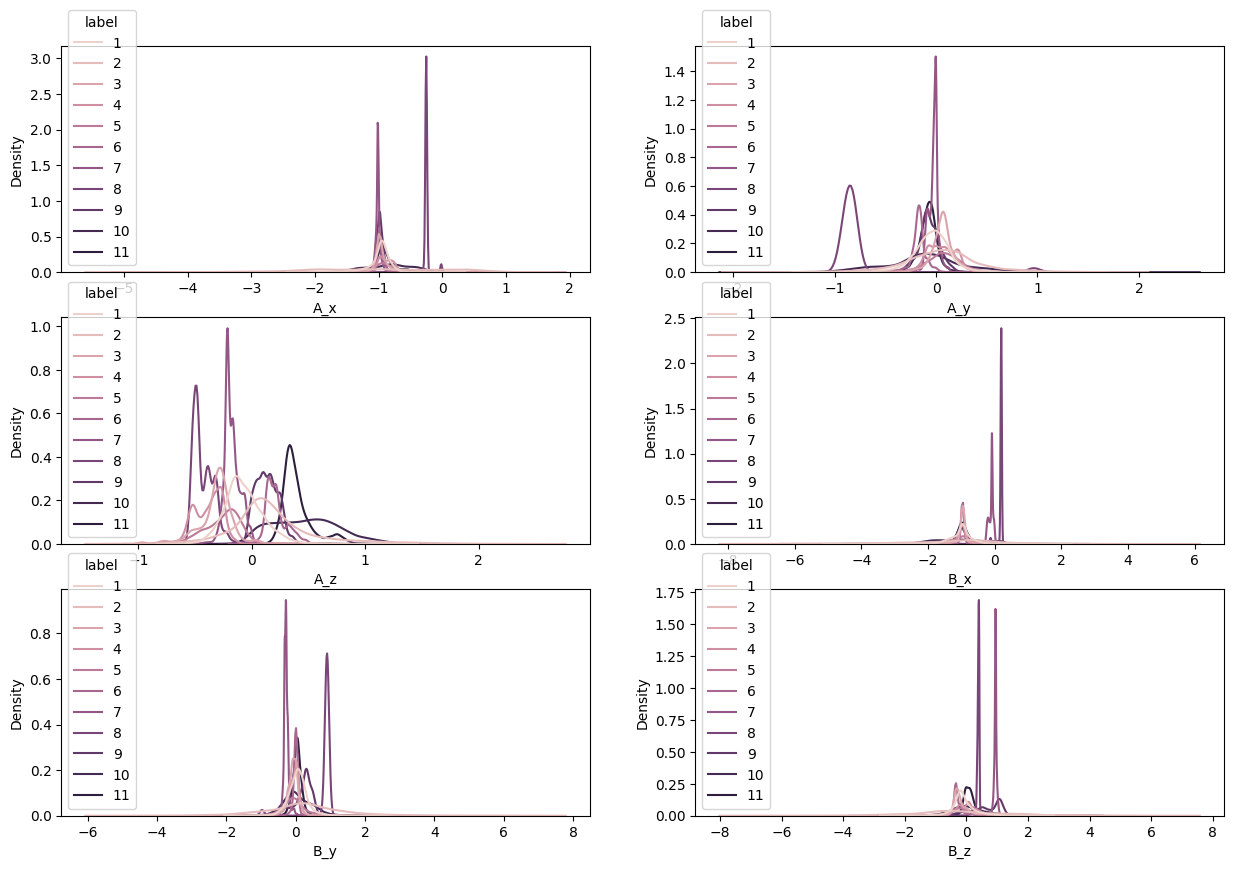

In [111]:
# 데이터 시각화
sensor_cols = ['A_x', 'A_y', 'A_z', 'B_x', 'B_y', 'B_z']
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=sensor_cols[i], hue='label', data = sorted)
plt.show()

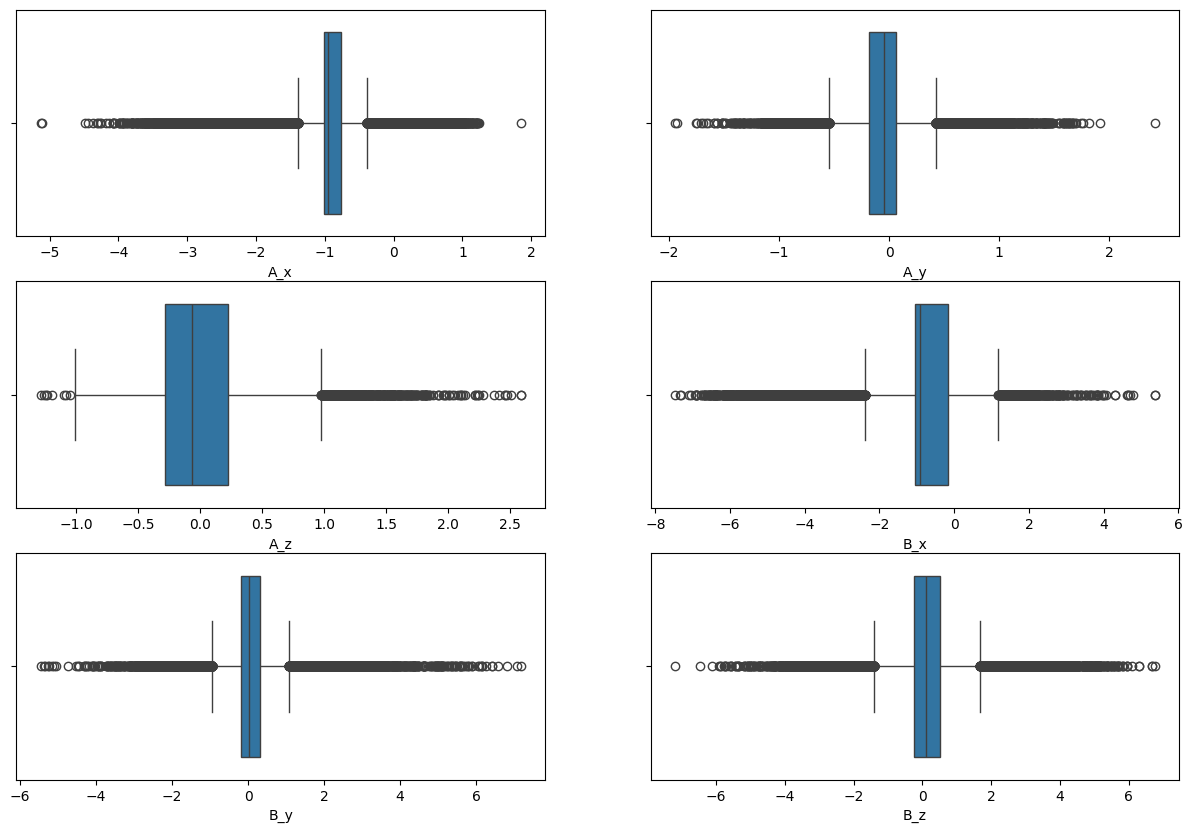

In [112]:
# 이상치 확인
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=sensor_cols[i], data = sorted)
plt.show()

In [113]:
data = sorted.copy()
data = data.set_index('timestamp')

# 데이터 준비

* 동적/정적 나누기

In [114]:
dynamic = [1, 2, 3, 4, 5, 9, 10]
data['is_dynamic'] = data['label'].replace(dynamic, 1)
data.loc[data['is_dynamic']!=1, 'is_dynamic'] = 0
# data['is_dynamic']
data

,index,A_x,A_y,A_z,B_x,B_y,B_z,label,is_dynamic
timestamp,,,,,,,,,
2000-01-01 00:00:00.000,78632,-0.988758,-0.144844,0.183325,-0.991851,-0.022659,-0.306466,6,0
2000-01-01 00:00:00.020,78653,-1.008465,NaN,0.156743,-0.976224,-0.040058,-0.277258,6,0
2000-01-01 00:00:00.040,46005,-0.991936,-0.143049,0.156618,-0.949758,-0.035796,-0.299548,6,0
2000-01-01 00:00:00.060,92967,-1.007975,-0.140831,0.155302,-1.006806,-0.013057,-0.289020,6,0
2000-01-01 00:00:00.080,37258,-0.991991,-0.159979,0.166965,NaN,0.015054,-0.293883,6,0
...,...,...,...,...,...,...,...,...,...
2019-01-12 02:02:02.020,97869,-0.979857,-0.174645,0.106490,-1.000812,-0.187465,0.421284,9,1
2019-01-12 02:02:02.040,8559,-1.001805,-0.167050,0.100627,-0.939697,NaN,0.334033,9,1
2019-01-12 02:02:02.060,11322,-1.016561,-0.154444,0.091794,-0.940531,-0.057243,NaN,9,1


* 이상치 처리

In [115]:
# 결측치 처리 -> 선형 보간
data = data.interpolate(method='linear', axis=0)

* x, y 분리

In [116]:
target1 = 'label'
target2 = 'is_dynamic'
sensor_cols = ['A_x', 'A_y', 'A_z', 'B_x', 'B_y', 'B_z']
x = data.loc[:,sensor_cols]
y1 = data.loc[:, target1]
y2 = data.loc[:, target2]

* 스케일링

In [117]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [80]:
x.shape, y1.shape

((100000, 6), (100000,))

In [81]:
x_train, x_test, y1_train , y1_test = train_test_split(x, y1, test_size=0.2, random_state=232)
x_train, x_test, y2_train , y2_test = train_test_split(x, y2, test_size=0.2, random_state=232)

# 머신러닝 모델링

In [82]:
model_names = ['LR', 'KNN', 'DT', 'RF', 'SVM', 'XGB', 'LGBM', 'DL']
result = pd.DataFrame({'name':model_names})

In [83]:
# 각 모델 점수 계산
def get_accuracy(name, score_name ,model, x_train, x_test, y_train, y_test):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print(f'{name} accuracy score : {accuracy_score(y_test, y_pred)}')
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        if not score_name in result.columns :
            result[score_name] = 0
        result.loc[result['name']==name, score_name] = accuracy_score(y_test, y_pred)

### 동적/정적 동작 구분 모델

In [84]:
import joblib

In [85]:
score_name = 'is_dynamic'

# LR
name = 'LR'
model = LogisticRegression()
get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
# KNN
name = 'KNN'
model = KNeighborsClassifier()
get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
joblib.dump(model, 'is_dynamic_knn.pkl')
# DT
name = 'DT'
model = DecisionTreeClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
joblib.dump(model, 'is_dynamic_dt.pkl')
# RF
name = 'RF'
model = RandomForestClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
joblib.dump(model, 'is_dynamic_rf.pkl')
# SVM
# name = 'SVM'
# model = SVC(kernel='linear')
# get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
# XGB
name = 'XGB'
model = XGBClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
joblib.dump(model, 'is_dynamic_xgb.pkl')
# LGBM
name = 'LGBM'
model = LGBMClassifier(max_depth= 5, verbose=-1)
get_accuracy(name, score_name, model, x_train, x_test, y2_train, y2_test)
joblib.dump(model, 'is_dynamic_lgbm.pkl')
# DL

LR accuracy score : 0.7916
[[ 4482  2799]
 [ 1369 11350]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.68      7281
           1       0.80      0.89      0.84     12719

    accuracy                           0.79     20000
   macro avg       0.78      0.75      0.76     20000
weighted avg       0.79      0.79      0.79     20000

KNN accuracy score : 0.97765
[[ 7108   173]
 [  274 12445]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7281
           1       0.99      0.98      0.98     12719

    accuracy                           0.98     20000
   macro avg       0.97      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

DT accuracy score : 0.94215
[[ 6794   487]
 [  670 12049]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7281
           1       0.96      0.95      0.95     12719

    a

['is_dynamic_lgbm.pkl']

In [86]:
result

,name,is_dynamic
0,LR,0.79160
1,KNN,0.97765
2,DT,0.94215
3,RF,0.95335
4,SVM,0.00000
5,XGB,0.97885
6,LGBM,0.97710
7,DL,0.00000


### 동적/정적으로 데이터 분리

In [87]:
only_d = data.loc[data['is_dynamic']==1,:]
only_d['label'] = only_d['label'].replace({1:0, 2:1, 3:2, 4:3, 5:4, 9:5, 10:6})

# x, y 분리
target = 'label'
x = only_d.loc[:, sensor_cols]
y = only_d.loc[:, target]

# 스케일링
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# only_s = data.loc[data['is_dynamic']==0,:]
# only_s['label'] = only_s['label'].replace({6:0, 7:1, 8:2, 11:3})

only_d.shape

(63420, 9)

### 동적 모션 분류 모델

In [88]:
score_name = 'dynamic_label'
# dynamic = [1, 2, 3, 4, 5, 9, 10]

# LR
name = 'LR'
model = LogisticRegression()
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'dynamic_lr.pkl')
# KNN
name = 'KNN'
model = KNeighborsClassifier()
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'dynamic_knn.pkl')
# DT
name = 'DT'
model = DecisionTreeClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'dynamic_dt.pkl')
# RF
name = 'RF'
model = RandomForestClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'dynamic_rf.pkl')
# SVM
# name = 'SVM'
# model = SVC(kernel='linear')
# get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
# joblib.dump(model, 'dynamic_svm.pkl')
# XGB
name = 'XGB'
model = XGBClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'dynamic_xgb.pkl')
# LGBM
name = 'LGBM'
model = LGBMClassifier(max_depth= 5, verbose=-1)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'dynamic_lgbm.pkl')
# DL

LR accuracy score : 0.5558183538315988
[[1342  481  205  120    6   81   54]
 [ 378 1101   90   47   27  346  447]
 [ 322   13  990  292    6   69    1]
 [  65    7  644  678    2   24    1]
 [ 469   41  389  193   38   10    0]
 [   9   41    0    0    0 1720   29]
 [ 128  526    3    1    0   67 1181]]
              precision    recall  f1-score   support

           0       0.49      0.59      0.54      2289
           1       0.50      0.45      0.47      2436
           2       0.43      0.58      0.49      1693
           3       0.51      0.48      0.49      1421
           4       0.48      0.03      0.06      1140
           5       0.74      0.96      0.84      1799
           6       0.69      0.62      0.65      1906

    accuracy                           0.56     12684
   macro avg       0.55      0.53      0.51     12684
weighted avg       0.55      0.56      0.53     12684

KNN accuracy score : 0.8432671081677704
[[1963   79   71   39   83   20   34]
 [ 167 2132    3   

['dynamic_lgbm.pkl']

* 동적 모션 분류 모델이 성능이 좋지 않으므로 딥러닝 시도

In [94]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
intensity = 0.001
# 딥러닝
clear_session()
model = Sequential([Dense(16, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer= l1(intensity)),
                    Dense(12, activation='relu', kernel_regularizer= l1(intensity)),
                    Dense(12, activation='relu', kernel_regularizer= l1(intensity)),
                    Dense(10, activation='relu', kernel_regularizer= l1(intensity)),
                    Dense(7, activation='softmax')])
model.summary()
es = EarlyStopping(monitor='val_loss', min_delta = 0.02, patience=5)
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=20, validation_split=.2, callbacks=[es]).history


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
Total params: 679 (2.65 KB)
Trainable params: 679 (2.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
732/732 [======

In [98]:
# joblib.dump(model, 'dynamic_dl.pkl')

['dynamic_dl.pkl']

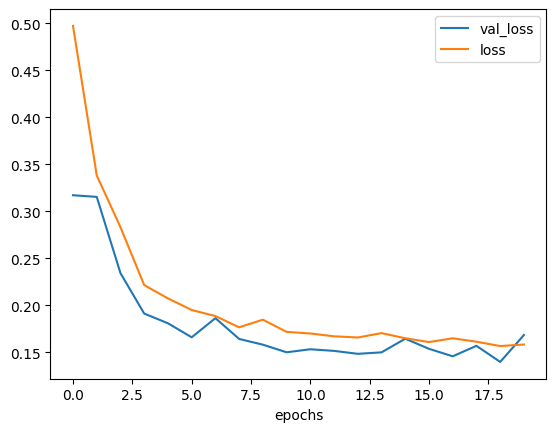

In [95]:
def plot_history(history):
  plt.plot(history['val_loss'], label='val_loss')
  plt.plot(history['loss'], label='loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()
plot_history(history)

In [96]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_test.values)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

229/229 [==============================] - 0s 2ms/step
[1 1 3 ... 1 0 1]
[1 1 0 ... 1 0 1]
[[ 805    0    2  282]
 [   0 2156    0    0]
 [   1   12 2252   14]
 [  25    0    2 1765]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1089
           1       0.99      1.00      1.00      2156
           2       1.00      0.99      0.99      2279
           3       0.86      0.98      0.92      1792

    accuracy                           0.95      7316
   macro avg       0.95      0.93      0.94      7316
weighted avg       0.96      0.95      0.95      7316



### 정적 모션 분류 모델

In [92]:
only_s = data.loc[data['is_dynamic']==0,:]
only_s['label'] = only_s['label'].replace({6:0, 7:1, 8:2, 11:3})

# x, y 분리
target = 'label'
x = only_s.loc[:, sensor_cols]
y = only_s.loc[:, target]

# 스케일링
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

only_s.shape

(36580, 9)

In [93]:
score_name = 'static_label'
# dynamic = [6, 7, 8, 11]

# LR
name = 'LR'
model = LogisticRegression()
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'static_lr.pkl')
# KNN
name = 'KNN'
model = KNeighborsClassifier()
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'static_knn.pkl')
# DT
name = 'DT'
model = DecisionTreeClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'static_dt.pkl')
# RF
name = 'RF'
model = RandomForestClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'static_rf.pkl')
# SVM
# name = 'SVM'
# model = SVC(kernel='linear')
# get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
# joblib.dump(model, 'static_svm.pkl')
# XGB
name = 'XGB'
model = XGBClassifier(max_depth= 5)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'static_xgb.pkl')
# LGBM
name = 'LGBM'
model = LGBMClassifier(max_depth= 5, verbose=-1)
get_accuracy(name, score_name, model, x_train, x_test, y_train, y_test)
joblib.dump(model, 'static_lgbm.pkl')

LR accuracy score : 0.9662383816293056
[[ 924    2    2  161]
 [   0 2154    0    2]
 [   1    7 2253   18]
 [  50    2    2 1738]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1089
           1       0.99      1.00      1.00      2156
           2       1.00      0.99      0.99      2279
           3       0.91      0.97      0.94      1792

    accuracy                           0.97      7316
   macro avg       0.96      0.95      0.96      7316
weighted avg       0.97      0.97      0.97      7316

KNN accuracy score : 0.9896118097320941
[[1052    0    1   36]
 [   0 2156    0    0]
 [   1    1 2275    2]
 [  34    0    1 1757]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1089
           1       1.00      1.00      1.00      2156
           2       1.00      1.00      1.00      2279
           3       0.98      0.98      0.98      1792

    accuracy                

['static_lgbm.pkl']

* 정적 모션 분류는 성능이 좋지만 동적 모션 분류가 성능이 좋지 않다
* 딥러닝 모델링

# 데이터 파이프 라인

In [60]:
result

,name,is_dynamic,dynamic_label,static_label
0,LR,0.79160,0.552428,0.972253
1,KNN,0.97765,0.847288,0.990295
2,DT,0.94215,0.654368,0.974850
3,RF,0.95610,0.720908,0.980454
4,SVM,0.79895,0.000000,0.000000
5,XGB,0.97885,0.841533,0.990022
6,LGBM,0.97710,0.837512,0.990842
7,DL,0.00000,0.000000,0.000000


In [119]:
is_d = joblib.load(project_path+'is_dynamic_lgbm.pkl')
only_d = joblib.load(project_path+'dynamic_lgbm.pkl')
only_s = joblib.load(project_path+'static_lgbm.pkl')
scaler = joblib.load(project_path+'scaler.pkl')

In [179]:
def pipeline(data, is_d, only_d, only_s, scaler):
  # 데이터 전처리
  data['timestamp'] = pd.to_datetime(data['timestamp']) # datetime으로 변환
  data = data.drop('timestamp', axis=1)
  # data = data.set_index('timestamp')

  data = data.interpolate(method='linear') # 결측치 처리

  # 데이터 준비
  target = 'label'
  sensor_cols = ['A_x', 'A_y', 'A_z', 'B_x', 'B_y', 'B_z']

  x = data.loc[:, sensor_cols]
  y = data.loc[:, target]

  x = scaler.transform(x)

  # 동적/정적 나누기
  y_pred = is_d.predict(x)
  data['is_dynamic'] = y_pred
  only_d_pred = data.loc[data['is_dynamic']==0, :]
  only_s_pred = data.loc[data['is_dynamic']==1, :]

  # 데이터 전처리
  only_d_pred['label'] = only_d_pred['label'].replace({1:0, 2:1, 3:2, 4:3, 5:4, 9:5, 10:6})
  only_s_pred['label'] = only_s_pred['label'].replace({6:0, 7:1, 8:2, 11:3})

  only_d_pred = only_d_pred.loc[:, sensor_cols]
  only_s_pred = only_s_pred.loc[:, sensor_cols]
  # display(only_d_pred['label'].value_counts())
  # display(only_s_pred['label'].value_counts())
  # 추론
  y_d_pred = only_d.predict(only_d_pred)
  y_s_pred = only_s.predict(only_s_pred)

  # # 결과 저장
  only_d_pred['label_pred'] = y_d_pred
  only_s_pred['label_pred'] = y_s_pred

  # print(only_d_pred)
  # print(only_s_pred)
  # # 다시 변환
  only_d_pred['label_pred'] = only_d_pred['label_pred'].replace({0:1, 1:2, 2:3, 3:4, 4:5, 5:9, 6:10})
  only_s_pred['label_pred'] = only_s_pred['label_pred'].replace({0:6, 1:7, 2:8, 3:11})

  # 데이터 concat
  pred_df = pd.concat([only_d_pred, only_s_pred], axis=0).sort_index()
  y_pred = pred_df['label_pred']

  # 평가
  print('accuracy_score :', accuracy_score(y, y_pred))
  print(confusion_matrix(y, y_pred))
  print(classification_report(y, y_pred))
  print(pred_df)
  # y_pred = pred_df.sort_values(by='Unnamed: 0')['label_pred']
  return y_pred

In [181]:
data = pd.read_csv(project_path+'train.csv')
result = pipeline(data, is_d, only_d, only_s, scaler)

accuracy_score : 0.01233
[[    0   299     0     0     0 10409    78     1     0     0   678]
 [    0   118     0     0     0  9568   332    31     0     0  2121]
 [    0    98     0     0     0  7677    37     0     0     0   493]
 [    0    99     0     0     0  6390    41     0     0     0   678]
 [    0    43     0     0     0  4735    71     0     0     0   562]
 [    0  4298     0     0     0  1014     1     0     0     0    64]
 [    0  8976     2     0     0   816     7     0     0     0   793]
 [    0  9744     0     0     1  1684     1     0     0     0    67]
 [    0   236     0     0     0  7098    69     0     0     0  1879]
 [    0   562     0     0     0  8221    40     5     0     0   751]
 [    2  7359     0     0     0  1650     7     0     0     0    94]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     11465
           2       0.00      0.01      0.01     12170
           3       0.00      0.00      0.00      830

In [170]:
sample = pd.read_csv(project_path+'sample.csv')
sample

,ID,label
0,0,1
1,1,4
2,2,11
3,3,9
4,4,7
...,...,...
13229,13229,4
13230,13230,9
13231,13231,4
13232,13232,1


In [186]:
submit = data[['Unnamed: 0']]
submit['label'] = result
submit = submit.rename(columns = {'Unnamed: 0': 'ID'})
submit

,ID,label
0,0,6
1,1,6
2,2,2
3,3,2
4,4,2
...,...,...
99995,99995,6
99996,99996,6
99997,99997,6
99998,99998,6


In [ ]:
pd.to_csv()